In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

## first, try to grab the information using beautiful soup ##

In [2]:
url = r'https://streeteasy.com/for-rent/downtown?page=[1-10]&sort_by=sqft_desc'

In [3]:
response = requests.get(url + str(1))

ConnectionError: HTTPSConnectionPool(host='streeteasy.com', port=443): Max retries exceeded with url: /for-rent/downtown?page=[1-10]&sort_by=sqft_desc1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000000009ECEC88>: Failed to establish a new connection: [Errno 11004] getaddrinfo failed'))

In [4]:
type(response)

NameError: name 'response' is not defined

In [5]:
responses

NameError: name 'responses' is not defined

In [6]:
street_soup = BeautifulSoup(response.content, "html.parser")

NameError: name 'response' is not defined

In [7]:
street_soup.find_all('div',{'class':'details row'})

NameError: name 'street_soup' is not defined

In [8]:
street_soup

<!DOCTYPE html>

<html>
<head>
<title>Pardon Our Interruption</title>
<link href="//cdn.distilnetworks.com/css/distil.css" media="all" rel="stylesheet" type="text/css"/>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="width=1000" name="viewport"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="max-age=0" http-equiv="cache-control">
<meta content="no-cache" http-equiv="cache-control"/>
<meta content="0" http-equiv="expires"/>
<meta content="Tue, 01 Jan 1980 1:00:00 GMT" http-equiv="expires"/>
<meta content="no-cache" http-equiv="pragma"/>
</meta></head>
<body class="block-page">
<div class="container">
<div class="row">
<div class="sidebar col-lg-4 col-sm-5">
<img alt="0" src="//cdn.distilnetworks.com/images/anomaly-detected.png"/>
</div>
<div class="content col-lg-8 col-sm-7">
<h1>Pardon Our Interruption...</h1>
<p>
					As you were browsing <strong>streeteasy.com</strong> something about your browser made us think you were a bot. T

In [293]:
# specific message below #

<h1>Pardon Our Interruption...</h1>
<p>
					As you were browsing <strong>streeteasy.com</strong> something about your browser made us think you were a bot. There are a few reasons this might happen:
				</p>
<ul>
<li>You're a power user moving through this website with super-human speed.</li>
<li>You've disabled JavaScript in your web browser.</li>
<li>A third-party browser plugin, such as Ghostery or NoScript, is preventing JavaScript from running. Additional information is available in this <a href="http://ds.tl/help-third-party-plugins" target="_blank" title="Third party browser plugins that block javascript">support article</a>.</li>

## From the above, it appears that StreetEasy knows I am using a program to access the site ##

## Try another route: Google Web Scraper

https://chrome.google.com/webstore/detail/web-scraper/jnhgnonknehpejjnehehllkliplmbmhn?hl=en

<iframe width="640" height="400" src="https://www.youtube.com/embed/n7fob_XVsbY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [302]:
from IPython.display import HTML
# Youtube
HTML('<iframe width="1080" height="720" src="https://www.youtube.com/embed/1EI5How6JG4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


## Data has been extracted
## Now, time for cleaning

In [8]:
directory = r'C:\General Assembly - Data Science Course\StreetEasyData\Data\\'

In [9]:
filename = r'aggregated_properties_final.csv'

In [10]:
streasy_pd = pd.read_csv(directory + filename, delimiter = '|',encoding = 'latin',names = ['google_scraper_id', 'parent_url','address_title','bed','bath','loc_type',
                                                                                           'size','address','address_url',
                                                                                          'price','amenities_long','availability','listed_timing','description','build_amenities',
                                                                                          'nearby_transport','nearby_transport_2'],
                        header = 0)

In [11]:
streasy_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 17 columns):
google_scraper_id     929 non-null object
parent_url            929 non-null object
address_title         929 non-null object
bed                   611 non-null object
bath                  909 non-null object
loc_type              929 non-null object
size                  929 non-null object
address               929 non-null object
address_url           929 non-null object
price                 929 non-null object
amenities_long        879 non-null object
availability          929 non-null object
listed_timing         929 non-null object
description           927 non-null object
build_amenities       867 non-null object
nearby_transport      929 non-null object
nearby_transport_2    929 non-null object
dtypes: object(17)
memory usage: 123.5+ KB


In [12]:
streasy_pd.head()

,google_scraper_id,parent_url,address_title,bed,bath,loc_type,size,address,address_url,price,amenities_long,availability,listed_timing,description,build_amenities,nearby_transport,nearby_transport_2
0,1558667897-130,https://streeteasy.com/for-rent/downtown?page=...,90 West Street #9X,0 bed,1 bath,Rental Unit in Financial District,610 ftÂ²,90 West Street #9X,https://streeteasy.com/building/90-west-street...,"â $3,195 for rent",Doorman ...,Available Now,24 Days,Large studio on high floor with south and west...,Bike Room ...,1 at Rector St 0....,R W at Cortlandt St...
1,1558757841-1826,https://streeteasy.com/for-rent/downtown?page=...,111 Fulton Street #817,0 bed,1 bath,Condo in Fulton/Seaport,900 ftÂ²,111 Fulton Street #817,https://streeteasy.com/building/district-111-f...,"$3,850 for rent",Cats and Dogs Allowed ...,6/15/2019,24 Days,The District is a full service boutique condom...,Cold Storage ...,A C J Z 2 ...,A C E 2 3 ...
2,1558668863-314,https://streeteasy.com/for-rent/downtown?page=...,55 Wall Street #837,0 bed,1 bath,Condo in Financial District,600 ftÂ²,55 Wall Street #837,https://streeteasy.com/building/cipriani-club-...,"â $3,550 for rent",Cats and Dogs Allowed ...,6/1/2019,151 Days,"Cipriani Club ResidencesThis FULLY-FURNISHED, ...",Concierge ...,2 3 at Wall St ...,J Z at Broad St ...
3,1558671867-823,https://streeteasy.com/for-rent/downtown?page=...,200 Water Street #327,0 bed,1 bath,Rental Unit in Fulton/Seaport,728 ftÂ²,200 Water Street #327,https://streeteasy.com/building/200-water-stre...,"$3,600 for rent",Doorman ...,Available Now,23 Days,large studio,Concierge ...,2 3 at Wall St ...,A C J Z 2 ...
4,1558753891-1246,https://streeteasy.com/for-rent/downtown?page=...,111 Fulton Street #817,0 bed,1 bath,Condo in Fulton/Seaport,900 ftÂ²,111 Fulton Street #817,https://streeteasy.com/building/district-111-f...,"$3,850 for rent",Cats and Dogs Allowed ...,6/15/2019,24 Days,The District is a full service boutique condom...,Cold Storage ...,A C J Z 2 ...,A C E 2 3 ...


## Extracted 18 pieces of info. Inevitable goal is to check how strong coefficients are for each using Linear Regression

## first, clean up neighborhood. Grab the neighborhood from values like "Condo in Tribeca"

In [13]:
streasy_pd['neighborhood'] = streasy_pd['loc_type'].apply(lambda x: x[x.find(' in ') + 4:].lstrip().rstrip())

In [14]:
streasy_pd.neighborhood.value_counts()

Tribeca                132
Financial District     103
Chelsea                 91
Battery Park City       83
East Village            62
Flatiron                58
NoMad                   54
West Village            54
West Chelsea            51
Gramercy Park           37
Greenwich Village       33
Stuyvesant Town/PCV     31
Fulton/Seaport          29
Lower East Side         28
Soho                    28
Nolita                  16
Hudson Square           12
Two Bridges              9
Noho                     8
Little Italy             7
Chinatown                3
Name: neighborhood, dtype: int64

## Assess the size, bed and bath columns. Clean this to only show integer values.

In [15]:
streasy_pd['size'].value_counts(ascending = False)

1,000 ftÂ²    38
900 ftÂ²      27
650 ftÂ²      19
1,200 ftÂ²    19
2,000 ftÂ²    19
750 ftÂ²      19
800 ftÂ²      17
1,100 ftÂ²    17
850 ftÂ²      16
1,500 ftÂ²    12
3,000 ftÂ²    11
1,400 ftÂ²    10
2,200 ftÂ²     9
1,600 ftÂ²     9
960 ftÂ²       8
1,800 ftÂ²     8
950 ftÂ²       8
714 ftÂ²       8
675 ftÂ²       8
1,250 ftÂ²     7
1,300 ftÂ²     7
723 ftÂ²       6
1,700 ftÂ²     6
1,350 ftÂ²     5
1,013 ftÂ²     5
2,213 ftÂ²     5
955 ftÂ²       5
764 ftÂ²       5
889 ftÂ²       4
791 ftÂ²       4
              ..
2,983 ftÂ²     1
747 ftÂ²       1
737 ftÂ²       1
1,780 ftÂ²     1
1,493 ftÂ²     1
1,235 ftÂ²     1
1,170 ftÂ²     1
2,944 ftÂ²     1
1,163 ftÂ²     1
679 ftÂ²       1
1,772 ftÂ²     1
2,130 ftÂ²     1
1,108 ftÂ²     1
801 ftÂ²       1
2,531 ftÂ²     1
2,025 ftÂ²     1
504 ftÂ²       1
1,664 ftÂ²     1
3,865 ftÂ²     1
2,126 ftÂ²     1
2,265 ftÂ²     1
1,030 ftÂ²     1
1,219 ftÂ²     1
2,250 ftÂ²     1
1,850 ftÂ²     1
2,650 ftÂ²     1
1,061 ftÂ²     1
799 ftÂ²      

In [16]:
streasy_pd['bed'].value_counts(ascending = False)

2 beds    246
1 bed     204
3 beds    108
4 beds     23
5 beds     17
0 bed      12
6 beds      1
Name: bed, dtype: int64

In [17]:
df = streasy_pd[(streasy_pd['size'].isnull() == False) & (streasy_pd['bed'].isnull() == False) & (streasy_pd['size'].isnull() == False)]

## Clean Bed

In [18]:
df['bed'] = df.bed.apply(lambda x: x.replace('bed','').lstrip().rstrip())
df['bed'] = df.bed.apply(lambda x: x.replace('s','').lstrip().rstrip())

C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Clean bath

In [19]:
df['bath'] = df.bath.apply(lambda x: str(x).replace('bath','').lstrip().rstrip())
df['bath'] = df.bath.apply(lambda x: str(x).replace('s','').lstrip().rstrip())

C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Clean Size

In [20]:
df['size'] = df['size'].apply(lambda x: x.replace('ftÂ²','').lstrip().rstrip())

C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Have a look. Ensure data there is clean

In [21]:
df.head()

,google_scraper_id,parent_url,address_title,bed,bath,loc_type,size,address,address_url,price,amenities_long,availability,listed_timing,description,build_amenities,nearby_transport,nearby_transport_2,neighborhood
0,1558667897-130,https://streeteasy.com/for-rent/downtown?page=...,90 West Street #9X,0,1,Rental Unit in Financial District,610,90 West Street #9X,https://streeteasy.com/building/90-west-street...,"â $3,195 for rent",Doorman ...,Available Now,24 Days,Large studio on high floor with south and west...,Bike Room ...,1 at Rector St 0....,R W at Cortlandt St...,Financial District
1,1558757841-1826,https://streeteasy.com/for-rent/downtown?page=...,111 Fulton Street #817,0,1,Condo in Fulton/Seaport,900,111 Fulton Street #817,https://streeteasy.com/building/district-111-f...,"$3,850 for rent",Cats and Dogs Allowed ...,6/15/2019,24 Days,The District is a full service boutique condom...,Cold Storage ...,A C J Z 2 ...,A C E 2 3 ...,Fulton/Seaport
2,1558668863-314,https://streeteasy.com/for-rent/downtown?page=...,55 Wall Street #837,0,1,Condo in Financial District,600,55 Wall Street #837,https://streeteasy.com/building/cipriani-club-...,"â $3,550 for rent",Cats and Dogs Allowed ...,6/1/2019,151 Days,"Cipriani Club ResidencesThis FULLY-FURNISHED, ...",Concierge ...,2 3 at Wall St ...,J Z at Broad St ...,Financial District
3,1558671867-823,https://streeteasy.com/for-rent/downtown?page=...,200 Water Street #327,0,1,Rental Unit in Fulton/Seaport,728,200 Water Street #327,https://streeteasy.com/building/200-water-stre...,"$3,600 for rent",Doorman ...,Available Now,23 Days,large studio,Concierge ...,2 3 at Wall St ...,A C J Z 2 ...,Fulton/Seaport
4,1558753891-1246,https://streeteasy.com/for-rent/downtown?page=...,111 Fulton Street #817,0,1,Condo in Fulton/Seaport,900,111 Fulton Street #817,https://streeteasy.com/building/district-111-f...,"$3,850 for rent",Cats and Dogs Allowed ...,6/15/2019,24 Days,The District is a full service boutique condom...,Cold Storage ...,A C J Z 2 ...,A C E 2 3 ...,Fulton/Seaport


In [22]:
df['size'].value_counts(ascending = False)

1,000    33
900      16
650      15
750      13
800      13
2,000    11
850      10
1,200     9
1,100     8
714       6
1,600     6
1,400     6
1,300     6
1,500     6
960       5
3,000     5
2,213     5
1,250     5
2,200     5
950       5
764       5
1,700     5
1,013     5
715       4
675       4
1,090     4
952       4
1,800     4
733       4
980       3
         ..
724       1
771       1
2,630     1
2,046     1
2,520     1
1,608     1
1,509     1
721       1
2,723     1
1,234     1
1,468     1
682       1
2,156     1
1,091     1
1,004     1
1,038     1
2,990     1
745       1
755       1
804       1
711       1
1,410     1
700       1
716       1
720       1
848       1
1,089     1
1,037     1
665       1
789       1
Name: size, Length: 306, dtype: int64

## Remove commas from numbers in bed, bath, and size, and set to an integer value

In [23]:
df['size'] = df['size'].apply(lambda x: int(x.replace(',','')))

C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Clean up the price. Price field includes things like "For Rent", "No Fee" and spacing. All we want is the integer value of the price.

In [24]:
df['price_clean'] = df['price'].apply(lambda x: int(x[x.find('$') + 1:].lstrip().rstrip().replace(',','').
                  replace('for rent','').
                  replace('NO FEE','').
                 replace(' ','')))

C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
df.price_clean.value_counts(ascending = False)

9000     12
8500     10
5200      8
4200      8
20000     8
5500      7
6500      7
9850      7
8000      6
6800      6
4100      6
5400      6
12500     6
35000     6
4950      6
5995      5
4500      5
25000     5
5800      5
7795      5
12000     5
5300      5
5150      5
4600      5
5520      4
7500      4
15000     4
9250      4
5900      4
7995      4
         ..
4595      1
4085      1
8114      1
10750     1
5750      1
4725      1
8120      1
6752      1
5720      1
4695      1
6733      1
9800      1
7750      1
7100      1
9600      1
10800     1
6700      1
3625      1
4643      1
4032      1
19999     1
17950     1
6685      1
12828     1
5650      1
7695      1
31500     1
4614      1
7684      1
4095      1
Name: price_clean, Length: 316, dtype: int64

## Handle the amenities (Text searching). In order to do this, create a function which reviews the amenities found for each property and assigns a 1 or 0 based on if the amenity appears. We will also do this in the price field to see if 'no fee' appears

In [26]:
def check_text(string,check_string):
    if check_string.upper() in str(string).upper():
        return 1
    else:
        return 0

In [27]:
check_text('this is a no fee apartment','no fee')

1

## Check 'no fee' in price. This may be an important piece of info to have

In [28]:
df['no_fee'] = df.price.apply(lambda x: check_text(x,'no fee'))

C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df[df['no_fee'] == 1].head()

,google_scraper_id,parent_url,address_title,bed,bath,loc_type,size,address,address_url,price,amenities_long,availability,listed_timing,description,build_amenities,nearby_transport,nearby_transport_2,neighborhood,price_clean,no_fee
9,1558757130-1765,https://streeteasy.com/for-rent/downtown?page=...,180 Water Street #1317,0,1,Rental Unit in Financial District,679,180 Water Street #1317,https://streeteasy.com/building/180-water-stre...,"$3,401 NO FEE",Doorman ...,7/7/2019,21 Days,NEW RESIDENTS â LIMITED TIME ONLYONE MONTH F...,Gym ...,2 3 at Wall St ...,Ferry at Pier 11 Ferry Landi...,Financial District,3401,1
20,1558757906-1847,https://streeteasy.com/for-rent/downtown?page=...,36 Peck Slip #2A,1,1,Rental Unit in Fulton/Seaport,930,36 Peck Slip #2A,https://streeteasy.com/building/historic-front...,"$4,800 NO FEE",Elevator ...,Available Now,46 Days,"This spacious 1 bedroom, 1 bath loft is locate...",Live-in Super,Ferry at Pier 11 Ferry Landi...,J Z 4 5 6 ...,Fulton/Seaport,4800,1
23,1558758038-1897,https://streeteasy.com/for-rent/downtown?page=...,10 Hanover Square #7I,1,1,Rental Unit in Financial District,833,10 Hanover Square #7I,https://streeteasy.com/building/10-hanover-squ...,"â $4,526 ...",Doorman ...,Available Now,128 Days,Limited Time Offer â Net Effective Rent list...,Bike Room ...,Ferry at Pier 11 Ferry Landi...,2 3 at Wall St ...,Financial District,4526,1
29,1558669757-574,https://streeteasy.com/for-rent/downtown?page=...,200 North End Avenue #28E,1,1,Rental Unit in Battery Park City,811,200 North End Avenue #28E,https://streeteasy.com/building/liberty-luxe/2...,"$5,950 NO FEE",Doorman ...,6/12/2019,48 Days,Available on 6/15 â 1 Month Free for June Oc...,Community Recreation Facilities ...,Ferry at World Financial Cen...,A C E 2 3 ...,Battery Park City,5950,1
30,1558669560-501,https://streeteasy.com/for-rent/downtown?page=...,37 Wall Street #17J,1,1,Rental Unit in Financial District,1219,37 Wall Street #17J,https://streeteasy.com/building/37-wall-street...,"â $5,000 ...",Doorman ...,Available Now,169 Days,Currently offering 1 MONTH FREE on a 13-month ...,Bike Room ...,2 3 at Wall St ...,J Z at Broad St ...,Financial District,5000,1


## First, extract lists of all amenities. Amenities are separated by multiple spaces. Therefore, we can use df.iteritems() and .split('  ') to get a list of all amenities found for each property

In [30]:
amen_list = []
for index, row in df['amenities_long'].apply(lambda x:str(x).split('  ')).iteritems():
    amen_list += row
amen_list = filter(None,amen_list)
amen_list = list(amen_list)
amen_list_set = set(amen_list)
amen_list = list(amen_list_set)
amen_list.remove('nan')
print(amen_list)

['Pets Allowed', 'Washer/Dryer In-Unit', 'Cats and Dogs Allowed', 'Doorman', 'Elevator', 'Cats Only - No Dogs', 'Full-time Doorman', 'Part-time Doorman']


## We can do the same thing for the building amenities

In [31]:
build_amen_list = []
for index, row in df['build_amenities'].apply(lambda x:str(x).split('  ')).iteritems():
    build_amen_list += row
build_amen_list = filter(None,build_amen_list)
build_amen_list = list(build_amen_list)
build_amen_list_set = set(build_amen_list)
build_amen_list = list(build_amen_list_set)
build_amen_list.remove('nan')
print(build_amen_list)

['Hot Tub', 'Guarantors Allowed', 'Deck', 'Laundry in Building', 'Fireplace', 'Concierge', 'Live-in Super', 'Parents Buying Allowed', 'Virtual Doorman', 'Community Recreation Facilities', 'Co-purchase Allowed', 'Swimming Pool', 'Media Room', 'Garage Parking', 'Roof Deck', 'Bike Room', 'Green Building', 'Central Air Conditioning', 'Loft', 'Gifts Allowed', 'Valet Parking', 'Waterview', 'Patio', 'Gym', 'Smoke-free', 'Sublets Allowed', 'Dishwasher', 'Terrace', "Children's Playroom", 'Storage Available', 'Guarantors Accepted', 'Package Room', 'Parking Available', 'Pied-a-Terre Allowed', 'Cold Storage']


## Create dummy columns based on all of the property amenities

In [32]:
df['cats_and_dogs'] = df.amenities_long.apply(lambda x: check_text(x,'Cats and Dogs Allowed'))
df['pets'] = df.amenities_long.apply(lambda x: check_text(x,'Pets Allowed'))
df['pt_doorman'] = df.amenities_long.apply(lambda x: check_text(x,'Part-time Doorman'))
df['doorman'] = df.amenities_long.apply(lambda x: check_text(x,'Doorman'))
df['elevator'] = df.amenities_long.apply(lambda x: check_text(x,'Elevator'))
df['cats'] = df.amenities_long.apply(lambda x: check_text(x,'Cats Only - No Dogs'))
df['ft_doorman'] = df.amenities_long.apply(lambda x: check_text(x,'Full-time Doorman'))
df['washer_dryer_in_unit'] = df.amenities_long.apply(lambda x: check_text(x,'Washer/Dryer In-Unit'))

C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [33]:
df[df['cats_and_dogs'] == 1]['amenities_long'].head()

1    Cats and Dogs Allowed                         ...
2    Cats and Dogs Allowed                         ...
4    Cats and Dogs Allowed                         ...
6    Cats and Dogs Allowed                         ...
7    Cats and Dogs Allowed                         ...
Name: amenities_long, dtype: object

## Do the same thing for all building amenities

In [34]:
for val in build_amen_list:
    print(val)

Hot Tub
Guarantors Allowed
Deck
Laundry in Building
Fireplace
Concierge
Live-in Super
Parents Buying Allowed
Virtual Doorman
Community Recreation Facilities
Co-purchase Allowed
Swimming Pool
Media Room
Garage Parking
Roof Deck
Bike Room
Green Building
Central Air Conditioning
Loft
Gifts Allowed
Valet Parking
Waterview
Patio
Gym
Smoke-free
Sublets Allowed
Dishwasher
Terrace
Children's Playroom
Storage Available
Guarantors Accepted
Package Room
Parking Available
Pied-a-Terre Allowed
Cold Storage


In [35]:
df['package_room'] = df.build_amenities.apply(lambda x: check_text(x,'Package Room'))
df['media_room'] = df.build_amenities.apply(lambda x: check_text(x,'Media Room'))
df['gifts_allowed'] = df.build_amenities.apply(lambda x: check_text(x,'Gifts Allowed'))
df['guarantors_allowed'] = df.build_amenities.apply(lambda x: check_text(x,'Guarantors Allowed'))
df['valet_parking'] = df.build_amenities.apply(lambda x: check_text(x,'Valet Parking'))
df['virtual_doorman'] = df.build_amenities.apply(lambda x: check_text(x,'Virtual Doorman'))
df['cold_storage'] = df.build_amenities.apply(lambda x: check_text(x,'Cold Storage'))
df['deck'] = df.build_amenities.apply(lambda x: check_text(x,'Deck'))
df['children_playroom'] = df.build_amenities.apply(lambda x: check_text(x,'Children''s Playroom'))
df['community_recreation_facilities'] = df.build_amenities.apply(lambda x: check_text(x,'Community Recreation Facilities'))
df['parking_available'] = df.build_amenities.apply(lambda x: check_text(x,'Parking Available'))
df['storage_available'] = df.build_amenities.apply(lambda x: check_text(x,'Storage Available'))
df['waterview'] = df.build_amenities.apply(lambda x: check_text(x,'Waterview'))
df['green_building'] = df.build_amenities.apply(lambda x: check_text(x,'Green Building'))
df['garage_parking'] = df.build_amenities.apply(lambda x: check_text(x,'Garage Parking'))
df['central_air_conditioning'] = df.build_amenities.apply(lambda x: check_text(x,'Central Air Conditioning'))
df['concierge'] = df.build_amenities.apply(lambda x: check_text(x,'Concierge'))
df['guarantors_accepted'] = df.build_amenities.apply(lambda x: check_text(x,'Guarantors Accepted'))
df['terrace'] = df.build_amenities.apply(lambda x: check_text(x,'Terrace'))
df['dishwasher'] = df.build_amenities.apply(lambda x: check_text(x,'Dishwasher'))
df['smoke-free'] = df.build_amenities.apply(lambda x: check_text(x,'Smoke-free'))
df['co-purchase_allowed'] = df.build_amenities.apply(lambda x: check_text(x,'Co-purchase Allowed'))
df['parents_buying_allowed'] = df.build_amenities.apply(lambda x: check_text(x,'Parents Buying Allowed'))
df['bike_room'] = df.build_amenities.apply(lambda x: check_text(x,'Bike Room'))
df['pied-a-terre_allowed'] = df.build_amenities.apply(lambda x: check_text(x,'Pied-a-Terre Allowed'))
df['loft'] = df.build_amenities.apply(lambda x: check_text(x,'Loft'))
df['swimming_pool'] = df.build_amenities.apply(lambda x: check_text(x,'Swimming Pool'))
df['hot_tub'] = df.build_amenities.apply(lambda x: check_text(x,'Hot Tub'))
df['patio'] = df.build_amenities.apply(lambda x: check_text(x,'Patio'))
df['laundry_in_building'] = df.build_amenities.apply(lambda x: check_text(x,'Laundry in Building'))
df['roof_deck'] = df.build_amenities.apply(lambda x: check_text(x,'Roof Deck'))
df['live-in_super'] = df.build_amenities.apply(lambda x: check_text(x,'Live-in Super'))
df['gym'] = df.build_amenities.apply(lambda x: check_text(x,'Gym'))
df['sublets_allowed'] = df.build_amenities.apply(lambda x: check_text(x,'Sublets Allowed'))
df['fireplace'] = df.build_amenities.apply(lambda x: check_text(x,'Fireplace'))

C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

## Use regular expression to extract information related to what floor the apartment is on. This likely is only helpful if we know how many floors are in the building. Therefore, might not use this.

In [36]:
import re
def floors(string):
    hash_index = string.find('#')
    floor_piece = ''
    if hash_index != -1:
        floor = 0
        floor_piece = string[hash_index:]
        floor_piece = floor_piece.replace('#','')
        
        if re.match(r'[0-9]+[A-Z]',floor_piece) != None:
            floor = int(re.match(r'[0-9]+', floor_piece)[0])
        
        elif re.match(r'[A-Z]{1}[0-9]+',floor_piece) != None:
            if len(floor_piece) == 2:
                floor = 0
            elif len(floor_piece) == 3:
                floor = int(floor_piece[1:2])
            elif len(floor_piece) == 4:
                floor = int(floor_piece[1:2])
            elif len(floor_piece) == 5:
                floor = int(floor_piece[1:3])
                
        elif re.match(r'[A-Z]{1}[0-9]{0}',floor_piece) != None:
            floor = 0
                
        else:
            if len(floor_piece) == 1:
                floor = 0
            elif len(floor_piece) == 2:
                floor = int(floor_piece[:1])
            elif len(floor_piece) == 3:
                floor = int(floor_piece[:1])
            elif len(floor_piece) == 4:
                floor = int(floor_piece[:2])
        return floor
    else:
        return 0
floors('417 Grand Street #D106')

1

In [37]:
df['floor'] = df.address_title.apply(lambda x: floors(x))

C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df['apt_number_shown'] = df.address_title.apply(lambda x: check_text(x,'#'))

C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
df['penthouse'] = df.address_title.apply(lambda x:check_text(x,'#PH'))

C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
df[(df['apt_number_shown'] == 1) & (df['floor'] == 0) & (df['penthouse'] == 0)]

,google_scraper_id,parent_url,address_title,bed,bath,loc_type,size,address,address_url,price,...,patio,laundry_in_building,roof_deck,live-in_super,gym,sublets_allowed,fireplace,floor,apt_number_shown,penthouse
62,1558754790-1487,https://streeteasy.com/for-rent/downtown?page=...,73 East 2nd Street #G1,1,1,Rental Unit in East Village,725,73 East 2nd Street #G1,https://streeteasy.com/building/73-east-2-stre...,"â $3,099 for rent",...,0,0,0,0,0,0,0,0,1,0
63,1558755110-1620,https://streeteasy.com/for-rent/downtown?page=...,107 Waverly Place #BF,1,1,Rental Unit in Greenwich Village,770,107 Waverly Place #BF,https://streeteasy.com/building/107-waverly-pl...,"$4,950 for rent",...,0,0,0,0,0,0,0,0,1,0
73,1558755084-1612,https://streeteasy.com/for-rent/downtown?page=...,647 E 14th Street #0MC,1,1,Rental Unit in Stuyvesant Town/PCV,762,647 E 14th Street #0MC,https://streeteasy.com/building/647-east-14-st...,"$3,527 for rent",...,0,1,0,0,0,0,0,0,1,0
110,1558756867-1679,https://streeteasy.com/for-rent/downtown?page=...,607 East 11th Street #7,1,1,Rental Unit in East Village,650,607 East 11th Street #7,https://streeteasy.com/building/607-east-11-st...,"$2,950 for rent",...,0,0,0,0,0,0,0,0,1,0
144,1558757958-1866,https://streeteasy.com/for-rent/downtown?page=...,645 E 14th Street #0TA,2,1,Rental Unit in Stuyvesant Town/PCV,948,645 E 14th Street #0TA,https://streeteasy.com/building/245-avenue-c-n...,"â $4,321 for rent",...,0,1,0,0,0,0,0,0,1,0
145,1558668390-209,https://streeteasy.com/for-rent/downtown?page=...,31 1/2 Greene Street #4,2,1,Co-op in Soho,2000,31 1/2 Greene Street #4,https://streeteasy.com/building/85-grand-stree...,"$12,000 for rent",...,0,0,0,0,0,0,0,0,1,0
149,1558671909-838,https://streeteasy.com/for-rent/downtown?page=...,179 Sullivan Street #4,2,1,Rental Unit in Greenwich Village,1200,179 Sullivan Street #4,https://streeteasy.com/building/179-sullivan-s...,"$8,200 NO FEE",...,0,0,0,0,0,0,0,0,1,0
157,1558753967-1286,https://streeteasy.com/for-rent/downtown?page=...,645 E 14th Street #0TA,2,1,Rental Unit in Stuyvesant Town/PCV,948,645 E 14th Street #0TA,https://streeteasy.com/building/245-avenue-c-n...,"â $4,321 for rent",...,0,1,0,0,0,0,0,0,1,0
179,1558668860-313,https://streeteasy.com/for-rent/downtown?page=...,98 Third Avenue #3,3,1,Rental Unit in East Village,1500,98 Third Avenue #3,https://streeteasy.com/building/98-3-avenue-ne...,"$8,495 for rent",...,0,0,0,0,0,0,0,0,1,0
181,1558668857-312,https://streeteasy.com/for-rent/downtown?page=...,98 Third Avenue #2,3,1,Rental Unit in East Village,1500,98 Third Avenue #2,https://streeteasy.com/building/98-3-avenue-ne...,"$7,995 for rent",...,0,0,0,0,0,0,0,0,1,0


In [41]:
df['floor'].value_counts().sort_values(ascending = False)

0     101
2      48
3      46
5      42
4      39
6      35
7      33
8      21
9      21
1      21
11     16
18     14
23     13
29     12
19     11
25     11
10     10
14     10
17      9
22      8
15      8
20      8
16      7
28      6
27      5
13      5
32      5
12      4
55      4
49      4
33      3
21      3
44      3
30      3
36      3
38      2
42      2
47      2
37      2
26      2
41      1
50      1
46      1
45      1
52      1
39      1
31      1
61      1
24      1
Name: floor, dtype: int64

In [42]:
df[df['floor'] == 0].head()

,google_scraper_id,parent_url,address_title,bed,bath,loc_type,size,address,address_url,price,...,patio,laundry_in_building,roof_deck,live-in_super,gym,sublets_allowed,fireplace,floor,apt_number_shown,penthouse
62,1558754790-1487,https://streeteasy.com/for-rent/downtown?page=...,73 East 2nd Street #G1,1,1,Rental Unit in East Village,725,73 East 2nd Street #G1,https://streeteasy.com/building/73-east-2-stre...,"â $3,099 for rent",...,0,0,0,0,0,0,0,0,1,0
63,1558755110-1620,https://streeteasy.com/for-rent/downtown?page=...,107 Waverly Place #BF,1,1,Rental Unit in Greenwich Village,770,107 Waverly Place #BF,https://streeteasy.com/building/107-waverly-pl...,"$4,950 for rent",...,0,0,0,0,0,0,0,0,1,0
73,1558755084-1612,https://streeteasy.com/for-rent/downtown?page=...,647 E 14th Street #0MC,1,1,Rental Unit in Stuyvesant Town/PCV,762,647 E 14th Street #0MC,https://streeteasy.com/building/647-east-14-st...,"$3,527 for rent",...,0,1,0,0,0,0,0,0,1,0
88,1558755155-1641,https://streeteasy.com/for-rent/downtown?page=...,200 E 11th Street #PH5,1,1,Rental Unit in East Village,780,200 E 11th Street #PH5,https://streeteasy.com/building/eleventh-and-t...,"$6,015 NO FEE",...,0,1,0,1,1,0,0,0,1,1
110,1558756867-1679,https://streeteasy.com/for-rent/downtown?page=...,607 East 11th Street #7,1,1,Rental Unit in East Village,650,607 East 11th Street #7,https://streeteasy.com/building/607-east-11-st...,"$2,950 for rent",...,0,0,0,0,0,0,0,0,1,0


## Set floor = 'PH' where penthouse (PH) in apartment address

In [43]:
df['floor'][df['penthouse'] == 1] = 'PH'

C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

In [44]:
df['floor'][df['penthouse'] == 1]

88     PH
134    PH
220    PH
244    PH
255    PH
398    PH
454    PH
583    PH
589    PH
615    PH
620    PH
633    PH
685    PH
697    PH
708    PH
720    PH
731    PH
745    PH
794    PH
801    PH
834    PH
835    PH
837    PH
892    PH
896    PH
Name: floor, dtype: object

## Lastly, create dummy columns for neighborhood

In [45]:
df_dummy = df.copy()
df_dummy = pd.get_dummies(df_dummy, columns = ['neighborhood'],prefix = ['neighborhood_'])

## data is clean ## 
## now we can investigate ##

In [46]:
df_dummy['floor'].value_counts()

0     76
2     48
3     46
5     42
4     39
6     35
7     33
PH    25
8     21
9     21
1     21
11    16
18    14
23    13
29    12
25    11
19    11
14    10
10    10
17     9
15     8
20     8
22     8
16     7
28     6
32     5
27     5
13     5
12     4
55     4
49     4
21     3
44     3
30     3
33     3
36     3
26     2
37     2
38     2
47     2
42     2
52     1
61     1
31     1
39     1
41     1
45     1
46     1
50     1
24     1
Name: floor, dtype: int64

In [47]:
df_dummy['bed'].value_counts()

2    246
1    204
3    108
4     23
5     17
0     12
6      1
Name: bed, dtype: int64

In [48]:
df_dummy['bath'].value_counts()

1      266
2      208
2.5     38
3       29
1.5     25
3.5     20
4.5     12
4        3
nan      3
5+       2
6        2
3+       1
5.5      1
5        1
Name: bath, dtype: int64

## Appear to be a few properties with null, 3+ and 5+ baths. Looked up these properties and found that these properties respectively had 1, 3.5 and 5.5 baths

In [49]:
df_dummy = df.copy()
df_dummy = pd.get_dummies(df_dummy, columns = ['neighborhood'],prefix = ['neighborhood_'])

In [50]:
pd.options.display.max_seq_items = 2000
df[(df_dummy['bath'] == 'nan') | (df_dummy['bath'] == '5+') | (df_dummy['bath'] == '3+')]['description']

862    Extraordinary opportunity to claim one of the ...
903    Disclaimer: This unit is virtually staged by a...
904    Disclaimer: This unit is virtually staged by a...
909    Option for a 3-month lease (July 1st â Sep 3...
918    Most peaceful one bedroom in Manhattan! Floor-...
919    Most peaceful one bedroom in Manhattan! Floor-...
Name: description, dtype: object

In [51]:
df_dummy['bath'][df_dummy['bath'] == '3+'] = '3.5'
df_dummy['bath'][df_dummy['bath'] == '5+'] = '5.5'

C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)
df_dummy[(df_dummy['bath'] == 'nan') | (df_dummy['bath'] == '5+') | (df_dummy['bath'] == '3+')]['address_url']

909    https://streeteasy.com/building/90-west-street-new_york/3v         
918    https://streeteasy.com/building/riverhouse-one-rockefeller-park/11k
919    https://streeteasy.com/building/riverhouse-one-rockefeller-park/11k
Name: address_url, dtype: object

In [53]:
df_dummy['bath'][(df_dummy['bath'] == 'nan') | (df_dummy['bath'] == '5+') | (df_dummy['bath'] == '3+')] = 1

C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
df_dummy['bath'].value_counts()

1      266
2      208
2.5    38 
3      29 
1.5    25 
3.5    21 
4.5    12 
5.5    3  
4      3  
1      3  
6      2  
5      1  
Name: bath, dtype: int64

In [55]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 919
Data columns (total 86 columns):
google_scraper_id                    611 non-null object
parent_url                           611 non-null object
address_title                        611 non-null object
bed                                  611 non-null object
bath                                 611 non-null object
loc_type                             611 non-null object
size                                 611 non-null int64
address                              611 non-null object
address_url                          611 non-null object
price                                611 non-null object
amenities_long                       583 non-null object
availability                         611 non-null object
listed_timing                        611 non-null object
description                          611 non-null object
build_amenities                      581 non-null object
nearby_transport                     611 

In [56]:
df_dummy.info()
df_dummy.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 919
Data columns (total 86 columns):
google_scraper_id                    611 non-null object
parent_url                           611 non-null object
address_title                        611 non-null object
bed                                  611 non-null object
bath                                 611 non-null object
loc_type                             611 non-null object
size                                 611 non-null int64
address                              611 non-null object
address_url                          611 non-null object
price                                611 non-null object
amenities_long                       583 non-null object
availability                         611 non-null object
listed_timing                        611 non-null object
description                          611 non-null object
build_amenities                      581 non-null object
nearby_transport                     611 

Index(['google_scraper_id', 'parent_url', 'address_title', 'bed', 'bath',
       'loc_type', 'size', 'address', 'address_url', 'price', 'amenities_long',
       'availability', 'listed_timing', 'description', 'build_amenities',
       'nearby_transport', 'nearby_transport_2', 'price_clean', 'no_fee',
       'cats_and_dogs', 'pets', 'pt_doorman', 'doorman', 'elevator', 'cats',
       'ft_doorman', 'washer_dryer_in_unit', 'package_room', 'media_room',
       'gifts_allowed', 'guarantors_allowed', 'valet_parking',
       'virtual_doorman', 'cold_storage', 'deck', 'children_playroom',
       'community_recreation_facilities', 'parking_available',
       'storage_available', 'waterview', 'green_building', 'garage_parking',
       'central_air_conditioning', 'concierge', 'guarantors_accepted',
       'terrace', 'dishwasher', 'smoke-free', 'co-purchase_allowed',
       'parents_buying_allowed', 'bike_room', 'pied-a-terre_allowed', 'loft',
       'swimming_pool', 'hot_tub', 'patio', 'laundry_i

## data is clean ## 
## now we can investigate ##

In [57]:
#disregard floor and the neighborhood information for now
columns = ['bed','bath','size','no_fee', 'cats_and_dogs', 'pets', 'pt_doorman', 'doorman', 'elevator',
       'cats', 'ft_doorman', 'washer_dryer_in_unit', 'package_room',
       'media_room', 'gifts_allowed', 'guarantors_allowed', 'valet_parking',
       'virtual_doorman', 'cold_storage', 'deck', 'children_playroom',
       'community_recreation_facilities', 'parking_available',
       'storage_available', 'waterview', 'green_building', 'garage_parking',
       'central_air_conditioning', 'concierge', 'guarantors_accepted',
       'terrace', 'dishwasher', 'smoke-free', 'co-purchase_allowed',
       'parents_buying_allowed', 'bike_room', 'pied-a-terre_allowed', 'loft',
       'swimming_pool', 'hot_tub', 'patio', 'laundry_in_building', 'roof_deck',
       'live-in_super', 'gym', 'sublets_allowed', 'fireplace', 'penthouse']

In [58]:
X = df_dummy[columns]

In [59]:
y = df_dummy.price_clean

In [60]:
X.head()

,bed,bath,size,no_fee,cats_and_dogs,pets,pt_doorman,doorman,elevator,cats,...,swimming_pool,hot_tub,patio,laundry_in_building,roof_deck,live-in_super,gym,sublets_allowed,fireplace,penthouse
0,0,1,610,0,0,0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,0
1,0,1,900,0,1,0,0,1,1,0,...,1,0,0,1,0,0,1,0,0,0
2,0,1,600,0,1,0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,0
3,0,1,728,0,0,1,0,1,1,0,...,0,0,0,0,0,1,1,0,0,0
4,0,1,900,0,1,0,0,1,1,0,...,1,0,0,1,0,0,1,0,0,0


In [61]:
X.count()

bed                                611
bath                               611
size                               611
no_fee                             611
cats_and_dogs                      611
pets                               611
pt_doorman                         611
doorman                            611
elevator                           611
cats                               611
ft_doorman                         611
washer_dryer_in_unit               611
package_room                       611
media_room                         611
gifts_allowed                      611
guarantors_allowed                 611
valet_parking                      611
virtual_doorman                    611
cold_storage                       611
deck                               611
children_playroom                  611
community_recreation_facilities    611
parking_available                  611
storage_available                  611
waterview                          611
green_building           

In [62]:
y.count()

611

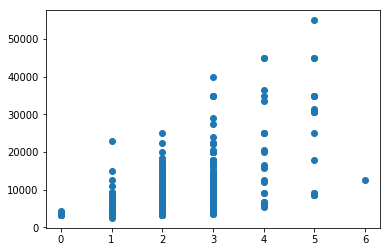

In [63]:
from matplotlib import pyplot as plt
plt.scatter(X.bed, y)

TypeError: 1 is not a string

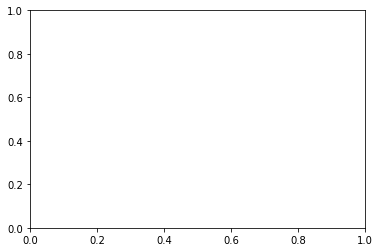

In [64]:
plt.scatter(X.bath, y)

In [66]:
X.bath.value_counts()

1      266
2      208
2.5    38 
3      29 
1.5    25 
3.5    21 
4.5    12 
5.5    3  
4      3  
1      3  
6      2  
5      1  
Name: bath, dtype: int64

In [67]:
X['bath'] = pd.to_numeric(X['bath'])

C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
X.bath.value_counts()

1.0    269
2.0    208
2.5    38 
3.0    29 
1.5    25 
3.5    21 
4.5    12 
5.5    3  
4.0    3  
6.0    2  
5.0    1  
Name: bath, dtype: int64

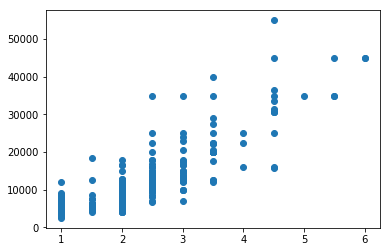

In [69]:
plt.scatter(X.bath, y)

In [70]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 20)

In [71]:
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
LR.score(X_test,y_test)

0.8574155075745067

In [73]:
cols_coefs = zip(X.columns, LR.coef_)

In [74]:
cols_coefs_dict = dict(cols_coefs)

In [75]:
coefs_df = pd.DataFrame.from_dict(cols_coefs_dict,orient = 'index')
coefs_df.columns = ['coef']

In [76]:
coefs_df['abs_coef'] = abs(coefs_df['coef'])

In [77]:
coefs_df.sort_values(by = 'abs_coef', ascending = False)

,coef,abs_coef
waterview,4.454365e+03,4.454365e+03
central_air_conditioning,4.124362e+03,4.124362e+03
loft,-3.112779e+03,3.112779e+03
parents_buying_allowed,-3.091011e+03,3.091011e+03
bath,3.078219e+03,3.078219e+03
penthouse,2.578124e+03,2.578124e+03
swimming_pool,1.835003e+03,1.835003e+03
gifts_allowed,1.705246e+03,1.705246e+03
patio,-1.596027e+03,1.596027e+03
terrace,-1.596027e+03,1.596027e+03


In [78]:
X.join(y).corr()['price_clean'].sort_values(ascending = False)

price_clean                        1.000000
size                               0.877563
bath                               0.851780
penthouse                          0.218019
swimming_pool                      0.205898
storage_available                  0.185838
washer_dryer_in_unit               0.172447
patio                              0.154928
terrace                            0.154928
valet_parking                      0.122777
central_air_conditioning           0.103763
fireplace                          0.072623
media_room                         0.070692
garage_parking                     0.069388
waterview                          0.058555
loft                               0.058297
pt_doorman                         0.046997
package_room                       0.038852
parking_available                  0.038787
bike_room                          0.037448
elevator                           0.036085
doorman                            0.028055
hot_tub                         

In [79]:
X_new = df_dummy[['size','bath','bed','penthouse']]

In [80]:
LR = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_new,y,random_state = 20)
LR.fit(X_train, y_train)
LR.score(X_test,y_test)

0.8577017333254114

In [81]:
preds = LR.predict(X_test)
print(len(preds))
print(len(X_test))
print(len(y_test))

153
153
153


In [82]:
list(zip(list(y_test),list(preds)))[:5]

[(4700, 3176.0904313176916),
 (12500, 16261.578904329544),
 (13250, 14574.28291316783),
 (5600, 7939.043366589038),
 (9850, 8321.089938978139)]

In [83]:
df_compare = pd.DataFrame(data= list(zip(list(y_test),list(preds))), columns = {'y_test','preds'})

In [84]:
df_compare.head()

,preds,y_test
0,4700,3176.090431
1,12500,16261.578904
2,13250,14574.282913
3,5600,7939.043367
4,9850,8321.089939


In [85]:
df_compare['pct_diff'] = (df_compare['y_test'] / df_compare['preds']) - 1

In [86]:
df_compare.head()

,preds,y_test,pct_diff
0,4700,3176.090431,-0.324236
1,12500,16261.578904,0.300926
2,13250,14574.282913,0.099946
3,5600,7939.043367,0.417686
4,9850,8321.089939,-0.155219


In [87]:
df_compare.mean()

preds       7873.235294
y_test      7897.524815
pct_diff    0.003389   
dtype: float64

## pct difference of .3

In [88]:
df_compare.to_csv('model_results.csv')

## Other things to consider: distance to subway

In [89]:
df_dummy.columns

Index(['google_scraper_id', 'parent_url', 'address_title', 'bed', 'bath',
       'loc_type', 'size', 'address', 'address_url', 'price', 'amenities_long',
       'availability', 'listed_timing', 'description', 'build_amenities',
       'nearby_transport', 'nearby_transport_2', 'price_clean', 'no_fee',
       'cats_and_dogs', 'pets', 'pt_doorman', 'doorman', 'elevator', 'cats',
       'ft_doorman', 'washer_dryer_in_unit', 'package_room', 'media_room',
       'gifts_allowed', 'guarantors_allowed', 'valet_parking',
       'virtual_doorman', 'cold_storage', 'deck', 'children_playroom',
       'community_recreation_facilities', 'parking_available',
       'storage_available', 'waterview', 'green_building', 'garage_parking',
       'central_air_conditioning', 'concierge', 'guarantors_accepted',
       'terrace', 'dishwasher', 'smoke-free', 'co-purchase_allowed',
       'parents_buying_allowed', 'bike_room', 'pied-a-terre_allowed', 'loft',
       'swimming_pool', 'hot_tub', 'patio', 'laundry_i

In [90]:
df_dummy['nearby_transport_dist1'] = df_dummy['nearby_transport'].apply(lambda x:str(x).split('  ')[-1])

In [91]:
df_dummy['nearby_transport_dist2'] = df_dummy['nearby_transport_2'].apply(lambda x:str(x).split('  ')[-1])

In [92]:
df_dummy['nearby_transport_dist1'][df_dummy['nearby_transport_dist1'] == 'under 500 feet'] = '0'

C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
df_dummy['nearby_transport_dist1'] = df_dummy['nearby_transport_dist1'].apply(lambda x: float(x.replace(' miles','')))

In [94]:
df_dummy['nearby_transport_dist2'][df_dummy['nearby_transport_dist2'] == 'under 500 feet'] = '0'
df_dummy['nearby_transport_dist2'] = df_dummy['nearby_transport_dist2'].apply(lambda x: float(x.replace(' miles','')))

C:\Users\LMURRAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
df_dummy[['nearby_transport','nearby_transport_2','nearby_transport_dist1','nearby_transport_dist2']]

,nearby_transport,nearby_transport_2,nearby_transport_dist1,nearby_transport_dist2
0,1 at Rector St 0.14 miles,R W at Cortlandt St 0.19 miles,0.14,0.19
1,A C J Z 2 3 4 5 at Fulton St-Broadway-Nassau under 500 feet,A C E 2 3 at Park Place 0.2 miles,0.00,0.20
2,2 3 at Wall St under 500 feet,J Z at Broad St under 500 feet,0.00,0.00
3,2 3 at Wall St 0.25 miles,A C J Z 2 3 4 5 at Fulton St-Broadway-Nassau 0.26 miles,0.25,0.26
4,A C J Z 2 3 4 5 at Fulton St-Broadway-Nassau under 500 feet,A C E 2 3 at Park Place 0.2 miles,0.00,0.20
5,A C E 1 2 3 at Chambers St under 500 feet,A C E 2 3 PATH at World Trade Center under 500 feet,0.00,0.00
6,2 3 at Wall St under 500 feet,4 5 at Wall St 0.12 miles,0.00,0.12
7,J Z at Broad St under 500 feet,2 3 at Wall St under 500 feet,0.00,0.00
8,6 at 23rd St 0.14 miles,N R W at 23rd St 0.18 miles,0.14,0.18
9,2 3 at Wall St 0.21 miles,Ferry at Pier 11 Ferry Landing 0.24 miles,0.21,0.24


In [96]:
columns = ['bed','bath','size','no_fee', 'cats_and_dogs', 'pets', 'pt_doorman', 'doorman', 'elevator',
       'cats', 'ft_doorman', 'washer_dryer_in_unit', 'package_room',
       'media_room', 'gifts_allowed', 'guarantors_allowed', 'valet_parking',
       'virtual_doorman', 'cold_storage', 'deck', 'children_playroom',
       'community_recreation_facilities', 'parking_available',
       'storage_available', 'waterview', 'green_building', 'garage_parking',
       'central_air_conditioning', 'concierge', 'guarantors_accepted',
       'terrace', 'dishwasher', 'smoke-free', 'co-purchase_allowed',
       'parents_buying_allowed', 'bike_room', 'pied-a-terre_allowed', 'loft',
       'swimming_pool', 'hot_tub', 'patio', 'laundry_in_building', 'roof_deck',
       'live-in_super', 'gym', 'sublets_allowed', 'fireplace', 'penthouse','nearby_transport_dist1','nearby_transport_dist2']

In [97]:
X = df_dummy[columns]
y = df_dummy['price_clean']

In [98]:
X.join(y).corr()['price_clean'].sort_values(ascending = False)

price_clean                        1.000000
size                               0.877563
penthouse                          0.218019
swimming_pool                      0.205898
storage_available                  0.185838
washer_dryer_in_unit               0.172447
terrace                            0.154928
patio                              0.154928
valet_parking                      0.122777
central_air_conditioning           0.103763
fireplace                          0.072623
media_room                         0.070692
garage_parking                     0.069388
waterview                          0.058555
loft                               0.058297
pt_doorman                         0.046997
package_room                       0.038852
parking_available                  0.038787
bike_room                          0.037448
elevator                           0.036085
doorman                            0.028055
hot_tub                            0.024869
dishwasher                      

In [99]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 20)

In [100]:
LR.fit(X_train, y_train)
LR.score(X_test,y_test)

0.8571492704905255

## Score went down. Could be the case that the distance between apartments and trains is more important for some trains than others.

## Other things to consider going forward:
## - neighborhood
## - proximity to landmarks (e.g. grocery stores, restaurants)
## - floor number... in order to do this, I would want to see the number of floors that are in the building. 6th floor in a high rise is different than the 6th floor in an 8 floor elevator building
## - some properties may have promotional pricing
## Other analysis pieces:
## - classification by neighborhood

In [101]:
df['neighborhood'].value_counts()

Tribeca                77
Financial District     70
Battery Park City      66
Chelsea                64
NoMad                  42
East Village           37
Flatiron               33
West Chelsea           33
Stuyvesant Town/PCV    31
West Village           27
Lower East Side        21
Fulton/Seaport         21
Gramercy Park          18
Greenwich Village      17
Soho                   15
Nolita                 13
Hudson Square          8 
Two Bridges            7 
Little Italy           5 
Noho                   4 
Chinatown              2 
Name: neighborhood, dtype: int64

In [102]:
X = df_dummy[['size','bath','penthouse']]
y = df_dummy['price_clean']

In [103]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 20)

In [104]:
LR.fit(X_train, y_train)
LR.score(X_test,y_test)

0.8519077614417118

## now try KNN to classify neighborhoods

In [167]:
knn_df = df_dummy.join(df[['neighborhood']])

In [168]:
columns = ['bed','bath','size','no_fee', 'cats_and_dogs', 'pets', 'pt_doorman', 'doorman', 'elevator',
       'cats', 'ft_doorman', 'washer_dryer_in_unit', 'package_room',
       'media_room', 'gifts_allowed', 'guarantors_allowed', 'valet_parking',
       'virtual_doorman', 'cold_storage', 'deck', 'children_playroom',
       'community_recreation_facilities', 'parking_available',
       'storage_available', 'waterview', 'green_building', 'garage_parking',
       'central_air_conditioning', 'concierge', 'guarantors_accepted',
       'terrace', 'dishwasher', 'smoke-free', 'co-purchase_allowed',
       'parents_buying_allowed', 'bike_room', 'pied-a-terre_allowed', 'loft',
       'swimming_pool', 'hot_tub', 'patio', 'laundry_in_building', 'roof_deck',
       'live-in_super', 'gym', 'sublets_allowed', 'fireplace', 'penthouse','nearby_transport_dist1',
           'nearby_transport_dist2']

In [169]:
X = knn_df[columns]

In [170]:
y = df['neighborhood']

In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=99)

def knn_check(n):
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=99)
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    return metrics.accuracy_score(y_test, y_pred_class)

In [172]:
knn_check(10)

0.24836601307189543

In [148]:
columns = ['bed','bath','size','penthouse','swimming_pool']
columns
knn_df[columns].head(1)

,bed,bath,size,penthouse,swimming_pool
0,0,1,610,0,0


In [178]:
def knn_check(n, columns):
    X_new = knn_df[columns]
    y_new = df['neighborhood']
    X_train, X_test, y_train, y_test = train_test_split(X_new,y_new, random_state=20)
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    return metrics.accuracy_score(y_test, y_pred_class)

knn_check(1,columns)

0.39215686274509803

In [205]:
knn_scores = []
for i in range(1,100):
    knn_scores.append([i,knn_check(i,columns)])

In [208]:
pd.DataFrame(data = knn_scores, columns = {'score','knn'}).head()

,score,knn
0,1,0.392157
1,2,0.274510
2,3,0.241830
3,4,0.202614
4,5,0.209150


In [209]:
knn_scores_df = pd.DataFrame(data = knn_scores, columns = {'knn','score'})

In [210]:
knn_scores_df.columns = ['knn','score']

In [211]:
knn_scores_df.head()

,knn,score
0,1,0.392157
1,2,0.274510
2,3,0.241830
3,4,0.202614
4,5,0.209150


In [212]:
knn_scores_df['knn'] = knn_scores_df['knn'].apply(lambda x:int(x))

In [213]:
knn_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
knn      99 non-null int64
score    99 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


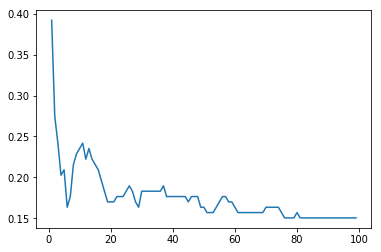

In [215]:
plt.plot(knn_scores_df['knn'],knn_scores_df['score'])

## From this, it appears that the less neighbors being looked at leads to a better model